
# Detección de anomalías mediante algoritmos de agrupación

## Objetivo: 
Comprender el concepto de detección de anomalías e implementar diferentes algoritmos de clustering para la detección de anomalías.

## Materiales:

Un ordenador con Python 3 y las siguientes librerías instaladas: scikit-learn, matplotlib, pandas.
Un conjunto de datos de uso común para la detección de anomalías, como el conjunto de datos de fraude con tarjetas de crédito (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).










## Paso 1

Comience por cargar el conjunto de datos de fraude con tarjetas de crédito en un marco de datos de pandas y realice un análisis exploratorio de datos (EDA) para familiarizarse con los datos. Realice tareas de preprocesamiento que considere necesarias. 



In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
###Intalar librerías
import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd 
import os
import seaborn as sns
import numpy as np

In [ ]:
# su código aquì
#importar la base de datos
directorio_actual = os.getcwd()
data = pd.read_csv("creditcard.csv")
X = data.drop(["Time", "Class"], axis=1)
Y = data["Class"]

In [ ]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


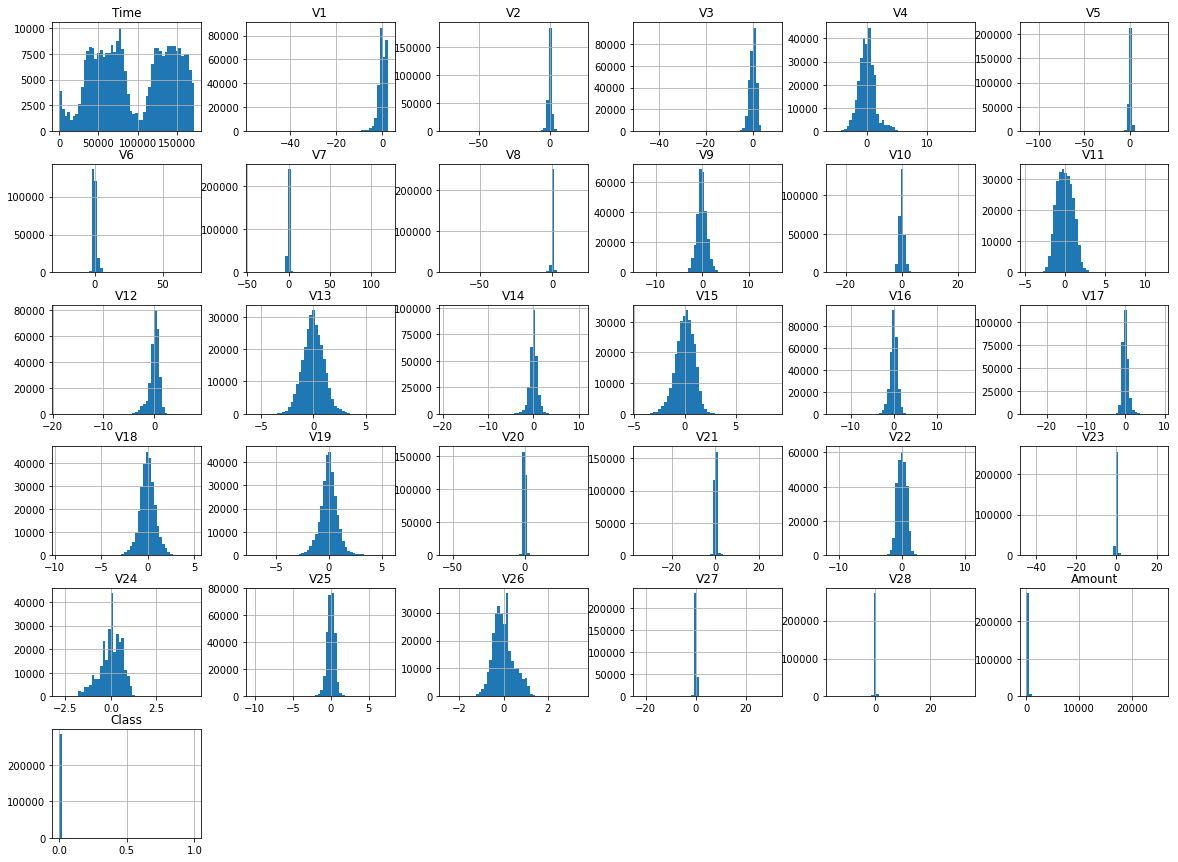

In [ ]:
data["Class"] = data["Class"].astype("int")
data.hist(bins=50, figsize=(20,15))
plt.show()

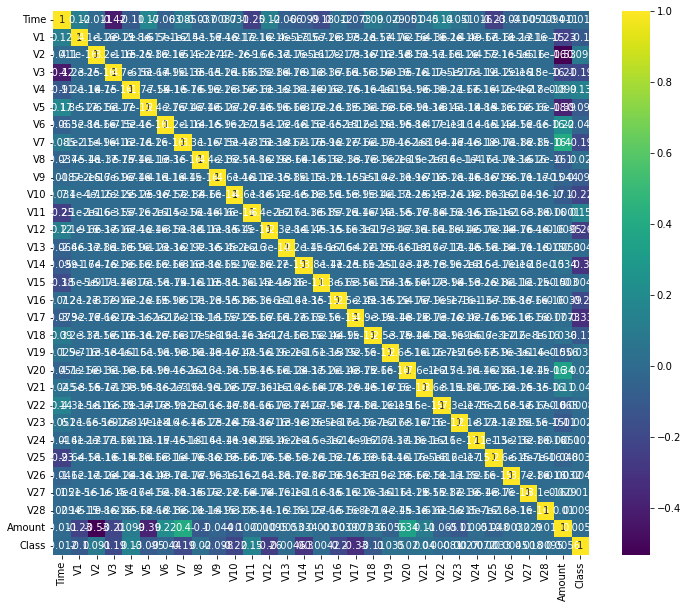

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

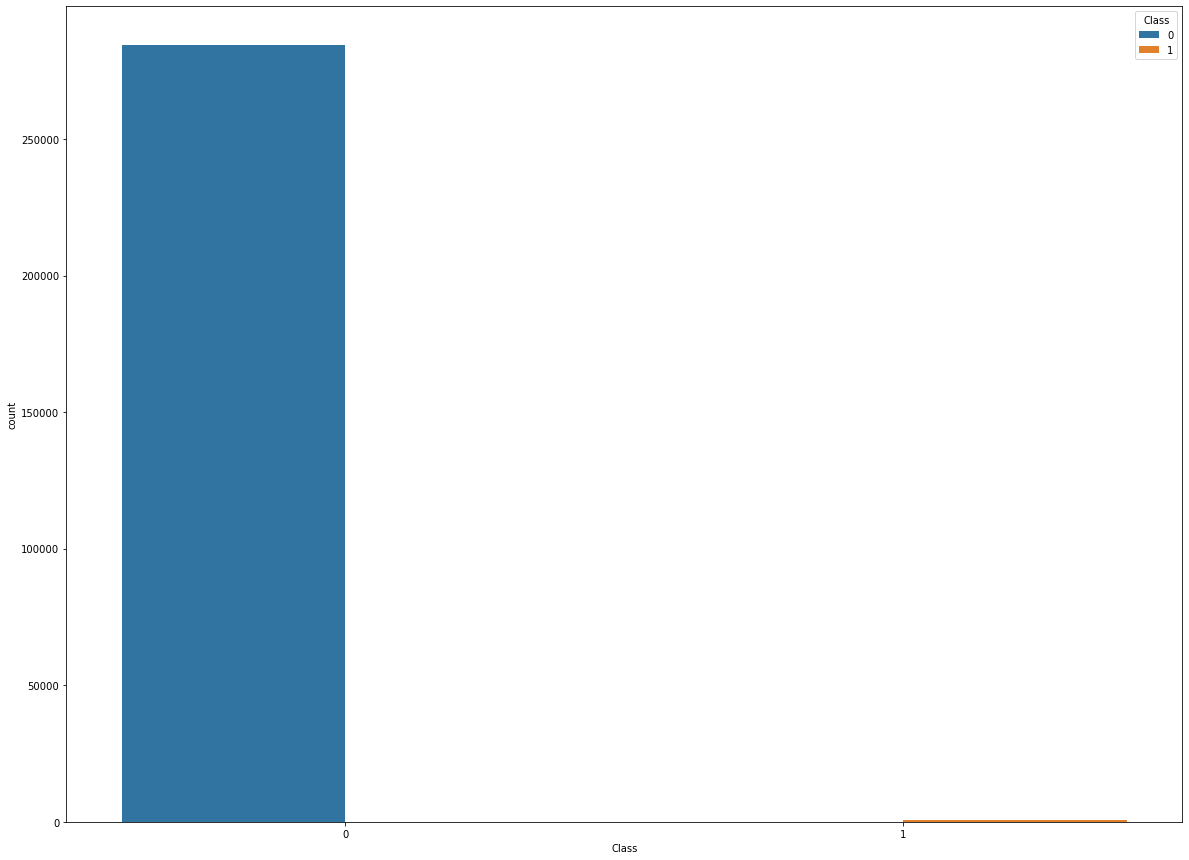

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(x='Class', hue='Class', data=data)
plt.show()

# Paso 2

Aplicar diferentes algoritmos de clustering, como K-Means, Density-Based Clustering (DBSCAN), Gaussian Mixture Model (GMM), y otros algoritmos de detección de anomalìas en el conjunto de datos de fraude con tarjetas de crédito.

# K-Means

In [ ]:

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering


def plot_elbow(kmeans_dict, elbow=None, w=11, h=5):
    plt.figure(figsize = (w,h))
    if elbow is not None:
        plt.axvline(x=elbow, linestyle='-.', c="black")
    plt.plot(kmeans_dict.keys(), [km.inertia_ for km in kmeans_dict.values()], '-o');
    ax = plt.gca()
    ax.tick_params('both', labelsize=(w+h)/2)
    ax.set_xlabel('K', fontsize=w)
    ax.set_ylabel("Inertia", fontsize=w)

In [ ]:
kmeans_results = {k : KMeans(n_clusters = k, random_state=1).fit(X) for k in range(1,10)}
kmeans_results

{1: KMeans(n_clusters=1, random_state=1),
 2: KMeans(n_clusters=2, random_state=1),
 3: KMeans(n_clusters=3, random_state=1),
 4: KMeans(n_clusters=4, random_state=1),
 5: KMeans(n_clusters=5, random_state=1),
 6: KMeans(n_clusters=6, random_state=1),
 7: KMeans(n_clusters=7, random_state=1),
 8: KMeans(random_state=1),
 9: KMeans(n_clusters=9, random_state=1)}

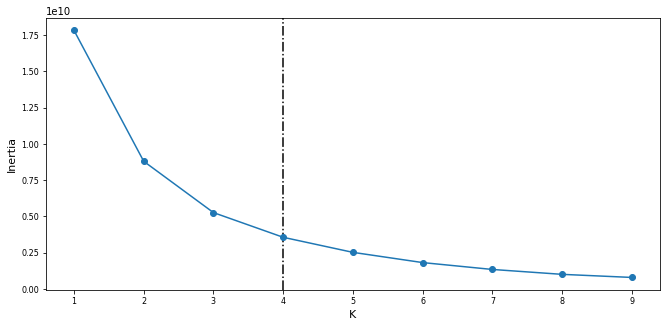

In [ ]:
plot_elbow(kmeans_results, elbow=4)

In [ ]:
kmeans = KMeans(4)
kmeans.fit(data)
clusters = kmeans.predict(data)

# Density-Based Clustering (DBSCAN)

In [ ]:

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
dbscan.fit(data)

DBSCAN()

# Gaussian Mixture Model (GMM)

In [ ]:

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
# gmm.fit(data.iloc[:, [27, 29]])
# labels = gmm.predict(data.iloc[:, [27, 29]])
# probs = gmm.predict_proba(data.iloc[:, [27, 29]])

gmm.fit(data)
labels = gmm.predict(data)
probs = gmm.predict_proba(data)

# OPTICS

In [ ]:
#Consultar otro.
from sklearn.cluster import OPTICS

# ajustar el modelo OPTICS
clustering = OPTICS(min_samples=10, xi=.05)
clustering.fit(data)

In [ ]:
# crear el gráfico de alcance
space = np.arange(len(X))
reachability = clustering.reachability_[clustering.ordering_]
labels = clustering.labels_[clustering.ordering_]

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(space, reachability, '.')
plt.plot(space[labels == -1], reachability[labels == -1], 'ro')
plt.title('Gráfico de Alcance de OPTICS')
plt.xlabel('Índice del punto de datos')
plt.ylabel('Alcance')
plt.show()

# Paso 3

Utilice los resultados de la agrupación para identificar transacciones anómalas.

# Kmeas

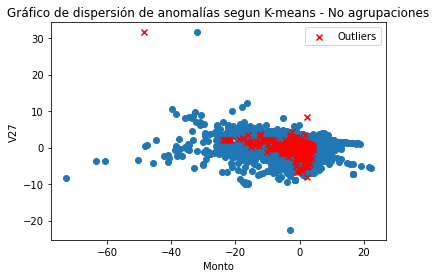

In [ ]:
distancias = kmeans.transform(data)
distancia_media = np.mean(distancias, axis=1)


# Definiendo un umbral para considerar un punto como outlier
umbral = 1.4 * np.mean(distancia_media)

# Identificando los posibles outliers
outliers = np.where(distancia_media > umbral)[0]

def Kmeans_Outliers():
    plt.scatter(data.iloc[:, 2], data.iloc[:, 27])
    plt.scatter(data.iloc[outliers, 3], data.iloc[outliers, 27], marker='x', color='r', label='Outliers')
    plt.title('Gráfico de dispersión de anomalías segun K-means - No agrupaciones')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()
    
Kmeans_Outliers()

# DBSCAN

In [ ]:

labels_series = pd.Series(dbscan.labels_)
counts = labels_series.value_counts()
print(counts)

-1     284671
 17        18
 16        18
 0          9
 18         9
 13         8
 6          6
 12         6
 14         6
 15         6
 4          5
 5          5
 7          5
 8          5
 3          5
 10         5
 11         5
 2          5
 1          5
 9          5
dtype: int64


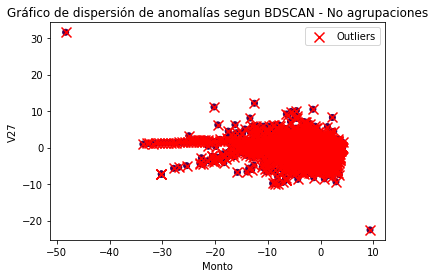

In [ ]:
def plot_BDSCAN_Outliers():
    plt.scatter(data.iloc[:, 3], data.iloc[:, 27], c=dbscan.labels_, cmap='viridis')
    plt.scatter(data[dbscan.labels_ == -1].iloc[:, 3], data[dbscan.labels_ == -1].iloc[:, 27], c='r', marker='x', s=100, label='Outliers')
    plt.title('Gráfico de dispersión de anomalías segun BDSCAN - No agrupaciones')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()
plot_BDSCAN_Outliers()

# GMM

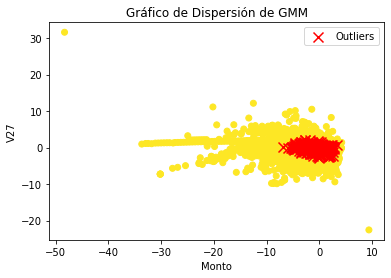

In [ ]:

#crear el gráfico de dispersión
def plot_GMM_Outliers():
    plt.scatter(data.iloc[:, 3], data.iloc[:, 27], c=np.max(probs, axis=1), cmap='viridis')
    # identificar posibles datos anómalos
    threshold = 0.75 #e busca maximizar la tasa de detección de fraudes (es decir, la tasa de verdaderos positivos, errores de tipo II)
    outliers = data[np.max(probs, axis=1) < threshold]
    # agregar los puntos anómalos al gráfico
    # plt.colorbar()
    plt.scatter(outliers.iloc[:, 3], outliers.iloc[:, 27], c='r', marker='x', s=100, label='Outliers')
    plt.title('Gráfico de Dispersión de GMM')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()
plot_GMM_Outliers()

# Paso 4
Visualice los resultados de cada algoritmo de agrupación mediante diagramas de dispersión y compárelos con las etiquetas de clase reales (fraude frente a no fraude).


# K-means

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


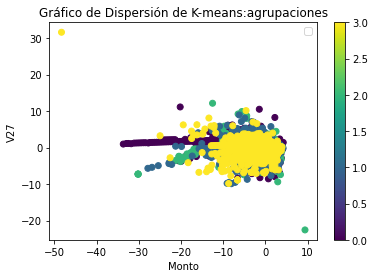

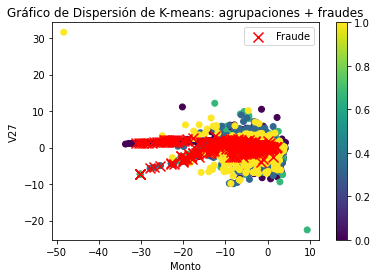

In [ ]:


y1_mask = (data['Class'] == 1)
data_y1 = data[y1_mask]

# crear la gráfica
def Kmean_cluster ():
    plt.scatter(data.iloc[:,3], data.iloc[:,27], c=clusters, cmap='viridis')
    # plt.scatter(data_y1.iloc[:,29], data_y1.iloc[:,27], c='red', marker='x', s=100, label='Fraude')
    plt.colorbar()
    plt.title('Gráfico de Dispersión de K-means:agrupaciones')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()
      
    
def Kmean_cluster_fraude ():
    plt.scatter(data.iloc[:,3], data.iloc[:,27], c=clusters, cmap='viridis')
    plt.scatter(data_y1.iloc[:,3], data_y1.iloc[:,27], c='r', marker='x', s=100, label='Fraude')
    plt.colorbar()
    plt.title('Gráfico de Dispersión de K-means: agrupaciones + fraudes')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()
    
Kmean_cluster()
Kmean_cluster_fraude()

# DBSCAN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


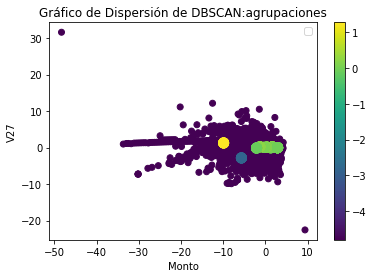

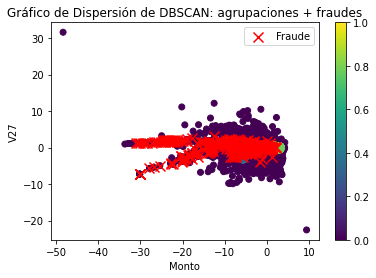

In [ ]:


y1_mask = (data['Class'] == 1)
data_y1 = data[y1_mask]

def plot_DBSCAN_grupos():
    plt.scatter(data.iloc[:, 3], data.iloc[:, 27], c=dbscan.labels_)
    plt.scatter(data[dbscan.labels_ != -1].iloc[:, 3], data[dbscan.labels_ != -1].iloc[:, 27], c=data[dbscan.labels_ != -1].iloc[:, 27], marker='o', s=100)
    # plt.scatter(data_y1.iloc[:,29], data_y1.iloc[:,27], c='red', marker='x', s=100, label='Fraude')
    plt.colorbar()
    plt.title('Gráfico de Dispersión de DBSCAN:agrupaciones')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()

def plot_DBSCAN_grupos_fraudes():
    plt.scatter(data.iloc[:, 3], data.iloc[:, 27], c=dbscan.labels_)
    plt.scatter(data[dbscan.labels_ != -1].iloc[:, 3], data[dbscan.labels_ != -1].iloc[:, 27], c=data[dbscan.labels_ != -1].iloc[:, 27], marker='o', s=100)
    plt.scatter(data_y1.iloc[:,3], data_y1.iloc[:,27], c='red', marker='x', s=100, label='Fraude')
    plt.colorbar()
    plt.title('Gráfico de Dispersión de DBSCAN: agrupaciones + fraudes')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()
    
plot_DBSCAN_grupos()
plot_DBSCAN_grupos_fraudes()

# GMM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


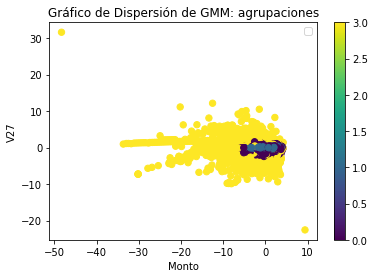

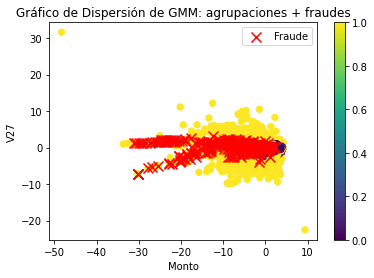

In [ ]:

def plot_scatter_grupos():
    plt.scatter(data.iloc[:, 3], data.iloc[:, 27], c=labels, s=40, cmap='viridis')
    # plt.scatter(data_y1.iloc[:,29], data_y1.iloc[:,27], c='red', marker='x', s=100, label='Fraude')
    plt.colorbar()
    plt.title('Gráfico de Dispersión de GMM: agrupaciones')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()

def plot_scatter_grupos_fraudes():
    plt.scatter(data.iloc[:, 3], data.iloc[:, 27], c=labels, s=40, cmap='viridis')
    plt.scatter(data_y1.iloc[:,3], data_y1.iloc[:,27], c='red', marker='x', s=100, label='Fraude')
    plt.colorbar()
    plt.title('Gráfico de Dispersión de GMM: agrupaciones + fraudes')
    plt.xlabel('Monto')
    plt.ylabel('V27')
    plt.legend()
    plt.show()

plot_scatter_grupos()
plot_scatter_grupos_fraudes()


# Paso 5
Discutir los pros y los contras de cada algoritmo y hacer recomendaciones sobre qué algoritmo es el más adecuado para este conjunto de datos específico.




**Sobre K means:**  
  
Como se puede observar en las gráficas siguientes, Kmeans puede identificar inicialmente ciertos datos atípicos. Estos datos atípicos se encuentran precisamente en el cluster más grande generado por este algoritmo. Al comparar el clustetr más grande con los outliers, mapean precisamente los puntos que corresponden en gran medida a las observaciones clasificadas como fraudes.

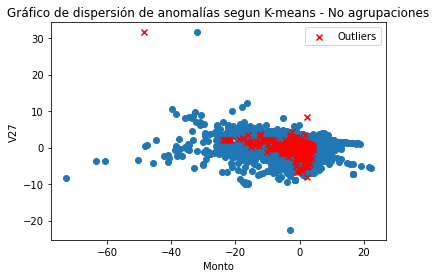

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


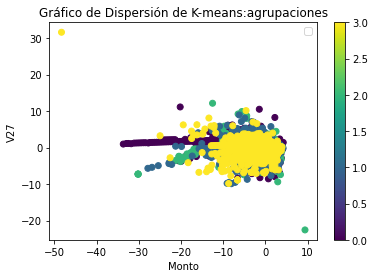

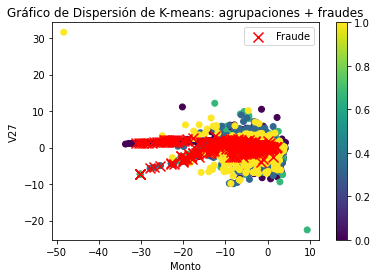

(None, None, None)

In [ ]:
Kmeans_Outliers(), Kmean_cluster(), Kmean_cluster_fraude()

**Sobre DBScan:**  
  
El algoritmo puede resultar costoso computacionalmente, en este caso no se utilizó ningun metodo para ajustar u obtener sus parametros óptimos, por lo que al generar los datos atípicos este me clasifica más del 90% de los datos. Por lo que me dice que la mayoría correspondería a anomalías.  
  
Por otro lado, las agrupaciones generadas son pequeñas. Al comparar estas agrupaciones con las observaciones que pertenecen a fraudes, su precisión podría resultar baja, dado que muchos fraudes no se encuentran en sus grupos. Este algorito podría presentar inconvenientes para ser usado para este conjunto de datos, quizas aumenter el error tipo 1 y 2.

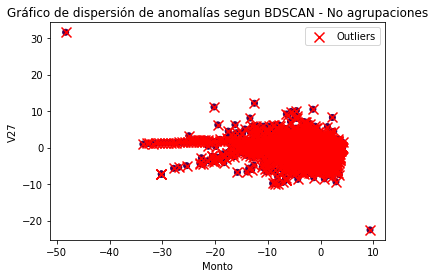

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


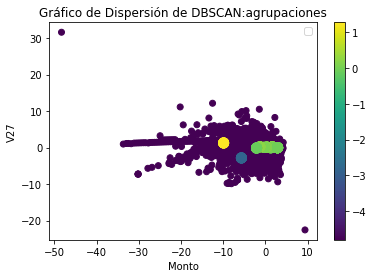

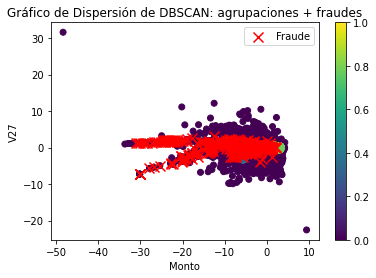

(None, None, None)

In [ ]:
plot_BDSCAN_Outliers(), plot_DBSCAN_grupos(), plot_DBSCAN_grupos_fraudes()

**Sobre GMM:**  
  
En este algoritmo las observaciones detectadas como anómalas, se ubican en gran medida en las áreas donde se generan los grupos. Los grupos son mas pequeños que los generados por el algoritmo de K means y más grandes que los generados por DBScan. Finalmente estas agrupaciones resultantes en identifican una buena parte de los fraudes. 

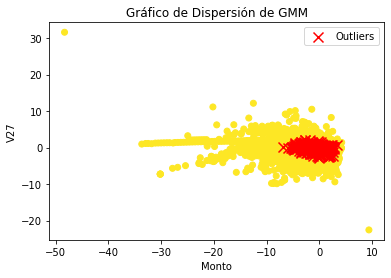

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


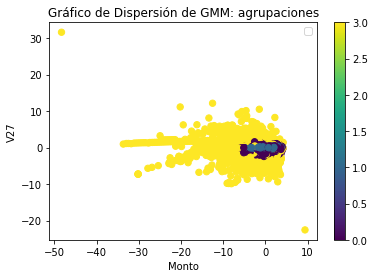

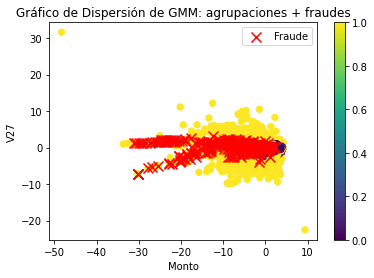

(None, None, None)

In [ ]:
plot_GMM_Outliers(), plot_scatter_grupos(), plot_scatter_grupos_fraudes()

Se recomienda el algoritmo Kmeans para este caso particular, dado que tanto en la detección de anomalías y agrupaciones, se puede identicar una precisión mayor de fraudes.

# Paso 6

Evaluar el rendimiento de cada algoritmo utilizando parámetros como la precisión, la recuperación y la puntuación F1.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluamos el rendimiento de cada modelo
kmeans_precision = precision_score(data["Class"], kmeans.labels_, average='macro')
kmeans_recall = recall_score(data["Class"], kmeans.labels_, average='macro')
kmeans_f1 = f1_score(data["Class"], kmeans.labels_, average='macro')

C:\Users\57350\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dbscan_precision = precision_score(data["Class"], dbscan.labels_, average='macro')
dbscan_recall = recall_score(data["Class"], dbscan.labels_, average='macro')
dbscan_f1 = f1_score(data["Class"], dbscan.labels_, average='macro')

C:\Users\57350\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gmm_precision = precision_score(data["Class"], labels, average='macro')
gmm_recall = recall_score(data["Class"], labels, average='macro')
gmm_f1 = f1_score(data["Class"], labels, average='macro')

C:\Users\57350\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"KMeans - Precision: {kmeans_precision:.2f}, Recall: {kmeans_recall:.2f}, F1-score: {kmeans_f1:.2f}")
print(f"DBSCAN - Precision: {dbscan_precision:.2f}, Recall: {dbscan_recall:.2f}, F1-score: {dbscan_f1:.2f}")
print(f"GMM - Precision: {gmm_precision:.2f}, Recall: {gmm_recall:.2f}, F1-score: {gmm_f1:.2f}")

KMeans - Precision: 0.25, Recall: 0.10, F1-score: 0.10
DBSCAN - Precision: 0.05, Recall: 0.00, F1-score: 0.00
GMM - Precision: 0.25, Recall: 0.08, F1-score: 0.12


Los resultados de las metricas muestran que KMeans y GMM tienen precisiones y F1-score similares. Sin embargo K means tiene un recall mayor. Por lo que sigue siendo el mejor algoritmo para este caso particular.